# Data Augmentation

In [1]:
"""
Generate the files with background sound.
    
@author: Juan Felipe Latorre Gil - jflatorreg@unal.edu.co
"""

import numpy as np 
import pandas as pd 
import librosa, librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
from time import process_time
from scipy.io.wavfile import write
from pathlib import Path

In [2]:
def get_spectrogram(wav):    
    
    """
    Gets the spectrogram of an audio signal with the Short-time Fourier transform (STFT).
    
    Parameters:
    ----------
        wav: numpy.array
            Audio time series.           
    Returns:
    -------
        spect: numpy.array 
            STFT matrix.
            
    """
    
    D = librosa.stft(wav, n_fft=480, hop_length=160,
                     win_length=480, window='hamming')
    spect, phase = librosa.magphase(D)
    return spect

## Load Background Sound

In [3]:
#we define the sample rate of the database that was used previously
sr = 22050

In [4]:
file_path_background = './BOG_lluvia_goteo_balcon_mono.wav'

In [5]:
wav_background, sr_background = librosa.load(file_path_background, sr=sr)

In [6]:
ipd.Audio(wav_background, rate=sr_background)

In [7]:
sr_background

22050

spectrogram shape: (241, 16733)


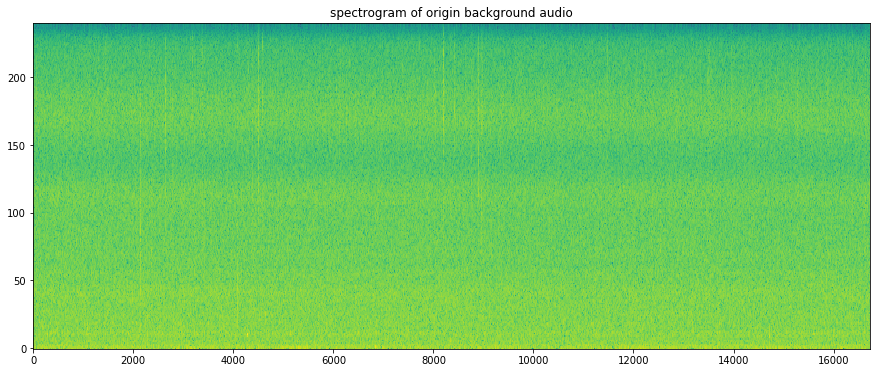

In [8]:
plt.figure(figsize=(15, 6))
log_spect = np.log(get_spectrogram(wav_background))
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of origin background audio')
plt.show()

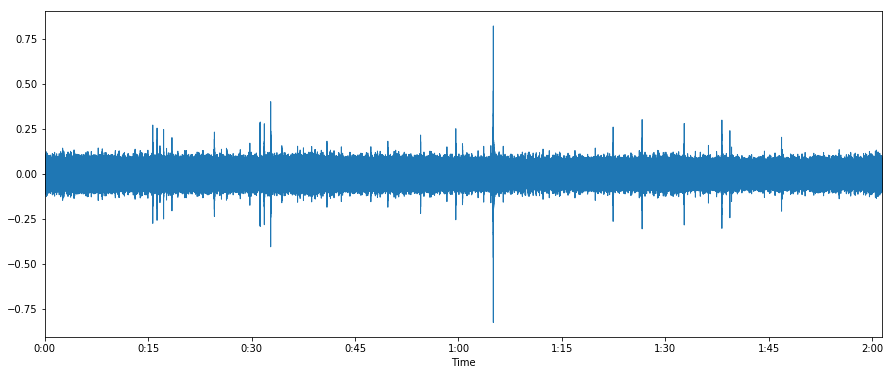

In [ ]:
#Plot Audio time series
plt.figure(figsize=(15, 6))
wav_background = wav_background
librosa.display.waveplot(wav_background)

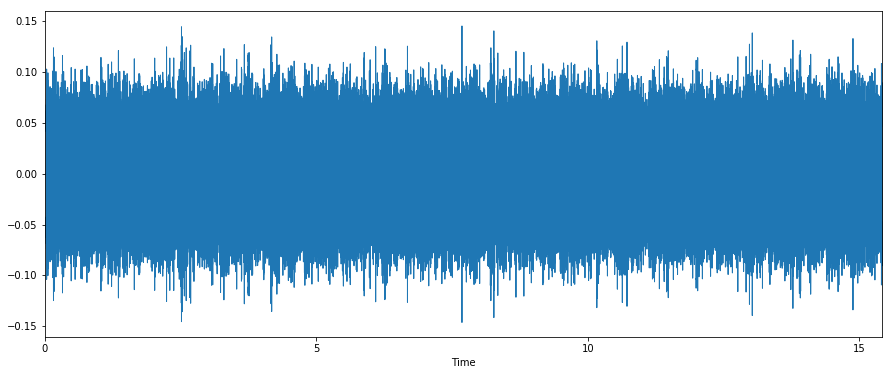

In [ ]:
#the first homogeneous segment is selected
plt.figure(figsize=(15, 6))
wav_background = wav_background[:340000]
librosa.display.waveplot(wav_background)

In [ ]:
#the inverse of the audio time series is defined to create a homogeneous file
wav_background_invert = np.asfortranarray(wav_background[::-1])

In [ ]:
#background audio file is created
wav_background = np.append(wav_background, [wav_background_invert,wav_background,wav_background_invert,
                                            wav_background_invert,wav_background,wav_background_invert,
                                            wav_background])

In [ ]:
#background audio file is normalized
wav_background_normalize = wav_background * (1/np.amax(wav_background))

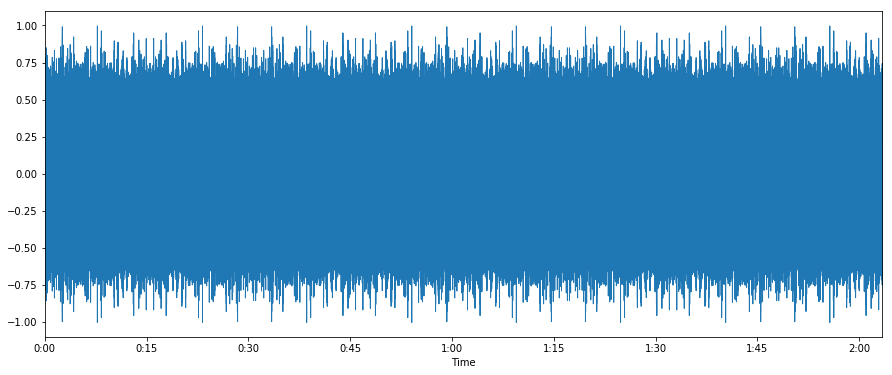

In [ ]:
plt.figure(figsize=(15, 6))
librosa.display.waveplot(wav_background_normalize)

spectrogram shape: (241, 17001)


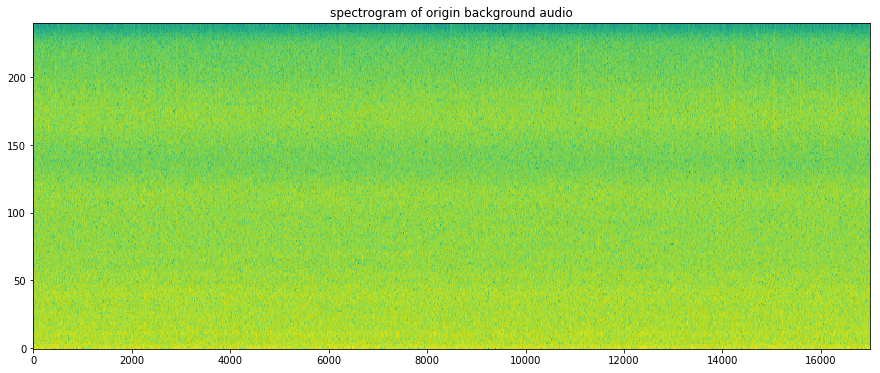

In [ ]:
plt.figure(figsize=(15, 6))
log_spect = np.log(get_spectrogram(wav_background_normalize))
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of origin background audio')
plt.show()

In [ ]:
ipd.Audio(wav_background_normalize, rate=sr)

## Generate files

In [ ]:
train_files = [
    path.name for path in Path().glob('./train/*.wav')
]
len(train_files)

In [ ]:
for file in train_files:
    wav, sr = librosa.load('./train/'+file, sr=None)
    wav_background_short = wav_background_normalize[:len(wav)]
    wav = (0.2 * wav_background_short) +  wav
    #write('./data_augmentation/set_1/'+ file, sr, wav)

In [ ]:
for file in train_files:
    wav, sr = librosa.load('./train/'+file, sr=None)
    wav_background_short = wav_background_normalize[:len(wav)]
    wav = (0.35 * wav_background_short) +  wav
    #write('./data_augmentation/set_2/'+ file, sr, wav)

In [ ]:
for file in train_files:
    wav, sr = librosa.load('./train/'+file, sr=None)
    wav_background_short = wav_background_normalize[:len(wav)]
    wav = (0.5 * wav_background_short) +  wav
    #write('./data_augmentation/set_3/'+ file, sr, wav)